# Classification with Neural Networks
- Classification is the task of categorizing the known classes based on their features. In most classification problems, machine learning algorithms will do the job, but while classifying a large dataset of images, you will need to use a neural network.

### Content
- Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255. The training and test data sets have 785 columns. The first column consists of the class labels (see above), and represents the article of clothing. The rest of the columns contain the pixel-values of the associated image.

- To locate a pixel on the image, suppose that we have decomposed x as x = i * 28 + j, where i and j are integers between 0 and 27. The pixel is located on row i and column j of a 28 x 28 matrix.
- For example, pixel31 indicates the pixel that is in the fourth column from the left, and the second row from the top, as in the ascii-diagram below.


## Labels

- Each training and test example is assigned to one of the following labels:

1. 0 for T-shirt/top
2. 1 for Trouser
3. 2 for Pullover
4. 3 for Dress
5. 4 for Coat
6. 5 for Sandal
7. 6 for Shirt
8. 7 for Sneaker
9. 8 for Bag
10. 9 for Ankle boot

- Let's start the task by first importing the necessary python libraries

In [3]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

- Let's load the [MNIST fashion dataset](https://www.kaggle.com/datasets/zalando-research/fashionmnist)

In [2]:
fashion = keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion.load_data()

4422102/4422102 [==============================] - 0s 0us/step


- Let's look at the shape of the training and test data

In [4]:
print('X_train', X_train.shape)
print('X_test', X_test.shape)
print('y_train', y_train.shape)
print('y_test', y_test.shape)

X_train (60000, 28, 28)
X_test (10000, 28, 28)
y_train (60000,)
y_test (10000,)


- Let's have a look at one of the samples of the images from the dataset

## Building a Neural Network Architecture
- Now we will build a neural network architecture with two hidden layers

Image Label:  4


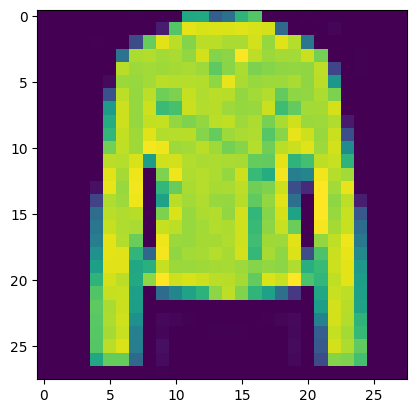

In [11]:
imgIndex = 9
image = X_train[imgIndex]
print('Image Label: ', y_train[imgIndex])
plt.imshow(image)

In [6]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape = [28,28]), # input layer
    keras.layers.Dense(300, activation='relu'), # hidden layer
    keras.layers.Dense(100, activation='relu'), # hidden layer
    keras.layers.Dense(10, activation='softmax') # output layer
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 300)               235500    
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


- Before training our model let's do two tasks:
1. scale our data so that our accuracy will increase while training
2. split our training data into training and validation sets

In [7]:
X_valid, X_train = X_train[:5000]/255.0, X_train[5000:]/255.0 # scaling and splitting our training data
y_valid, y_train = y_train[:5000], y_train[5000:]

# Training a Classification Model with Neural Networks
- Now here’s how we can train a neural network for the task of image classification

In [9]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.7230 - accuracy: 0.7639 - val_loss: 0.5109 - val_accuracy: 0.8300
Epoch 2/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4862 - accuracy: 0.8301 - val_loss: 0.4869 - val_accuracy: 0.8300
Epoch 3/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4429 - accuracy: 0.8441 - val_loss: 0.4357 - val_accuracy: 0.8468
Epoch 4/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4137 - accuracy: 0.8542 - val_loss: 0.4027 - val_accuracy: 0.8606
Epoch 5/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3955 - accuracy: 0.8604 - val_loss: 0.4269 - val_accuracy: 0.8502
Epoch 6/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3784 - accuracy: 0.8652 - val_loss: 0.3846 - val_accuracy: 0.8622
Epoch 7/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3657 - accuracy: 0.8700 - val_loss: 0.3605 - val_accurac

- Now, let's have a look at the predictions

In [10]:
predictions = model.predict(X_test)
predictions

313/313 [==============================] - 1s 3ms/step


array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.99999994],
       [0.        , 0.        , 0.99999994, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.99999994, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.99999994,
        0.        ],
       [0.        , 0.99999994, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]], dtype=float32)

- Let's look at the predicted classes

In [13]:
classes = np.argmax(predictions, axis=1)
classes

array([9, 2, 1, ..., 8, 1, 5])

- Let's if our model classifies the image well by taking an example from the test then comparing it to our prediction

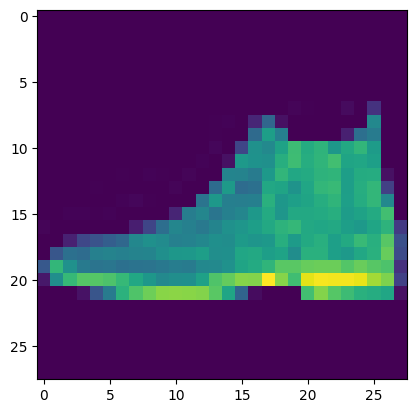

In [15]:
# display an image from our test data
plt.imshow(X_test[0])

In [16]:
# checking the predicted output
print(np.argmax(predictions[0])) # np.argmax finds a maximum element from an array and returns the index of it

9


- As you can see the image was an Ankle boot and our model predicted it eith the label 9 which is representation for sn Ankle boot

### Confusion matrix

Text(95.72222222222221, 0.5, 'Truth')

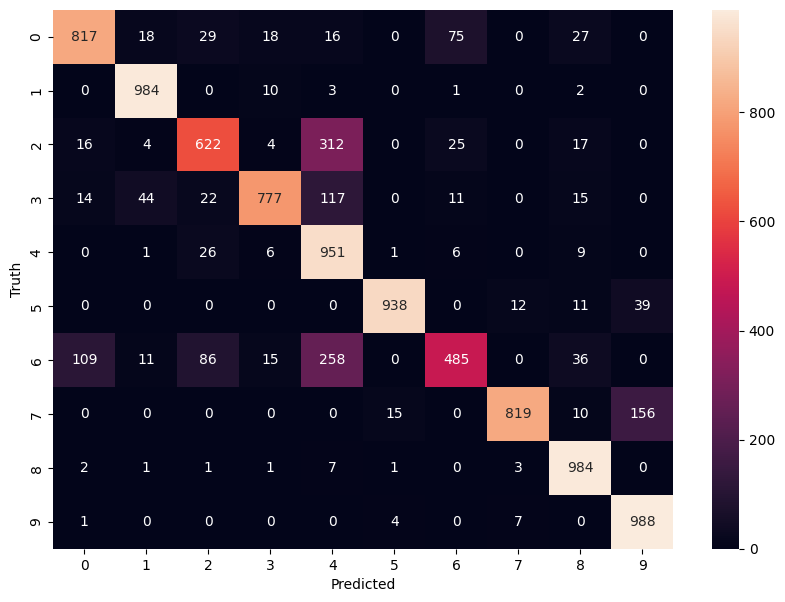

In [18]:
import seaborn as sns

# let's assign the predictions and labels for the predictions
y_predicted = predictions
y_predicted_labels = [np.argmax(i) for i in y_predicted]

# calculate the confusion matrix
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)

# let's plot a heatmap to visulize the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

- As you can see from the above heatmap there were some misclassifications from our model for instance, there were 312 misclassifications for the truth value 2 which was predicted as 4 which is not correct.
- To boost our neural network's accuracy we can do the following:
  - More & clean data
  - Tune hyperparameters (learning rate, etc.)
  - Regularize (dropout)
  - Try more layers/neurons (but avoid overfitting)
  - Train for more epochs (until it stops improving)